In [2]:
#proste modele populacyjne

'''
1. Model Fibonacciego(1202r)
x_n+1 = x_n + x_n-1
'''

'''
zad. 1. 
'''

'\nzad. 1. \n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def N(t, lamb):
    return 10*np.e**(lamb*t)

def N_th(t, h, lamb):
    _N = N(t, lamb)
    return _N + h*lamb*_N

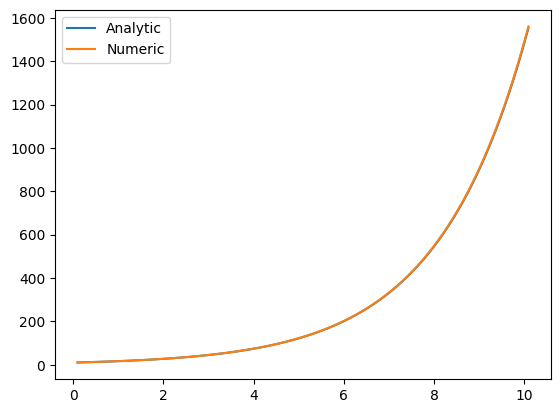

In [5]:
t_space = np.arange(0.1, 10.1, 0.01)

Ns = N(t_space, 0.5)
Nths = N_th(t=t_space, h=0.01, lamb=0.5)

plt.plot(t_space, Ns, label='Analytic')
plt.plot(t_space, Nths, label='Numeric')
plt.legend()
plt.show()

In [6]:
'''
Model Verhuista
N'(t)
'''

"\nModel Verhuista\nN'(t)\n"

In [7]:
def N_bis(t, lamb, k, N):
    return lamb**2 * N*(1-(N/k))*(1-(2*N/k))



def Ver(t, h, lamb, k, N):
    return N + h*lamb*(1-(N/k))*N + ((h**2)/2)* N_bis(t, lamb, k, N)

#def Ver_analytic(t, lamb, )

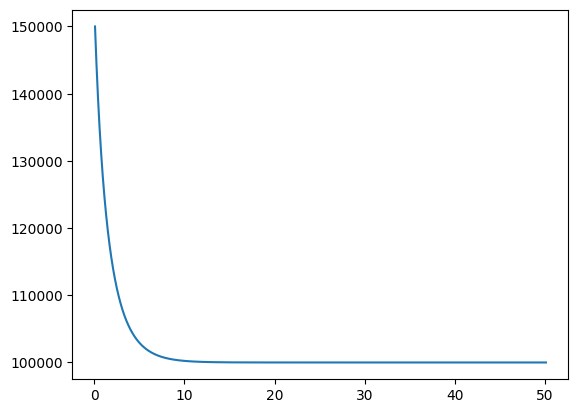

In [8]:
t_space = np.arange(0.1, 50.1, 0.01)
Vers = [150_000]

for t in t_space:
    new_Ver = Ver(t, 0.01, 0.5, 100_000, Vers[-1])
    Vers.append(new_Ver)

plt.plot(t_space, Vers[:-1])
plt.show()

In [9]:
def N1_prim(epsilon, gamma, N1, N2):
    return (epsilon - gamma*N2)*N1

def N2_prim(epsilon, gamma, N1, N2):
    return (-epsilon + gamma*N1)*N2

def N1_th(epsilon, gamma, N1, N2, k):
    return N1 + k*N1_prim(epsilon, gamma, N1, N2)

def N2_th(epsilon, gamma, N1, N2, k):
    return N2 + k*N2_prim(epsilon, gamma, N1, N2)

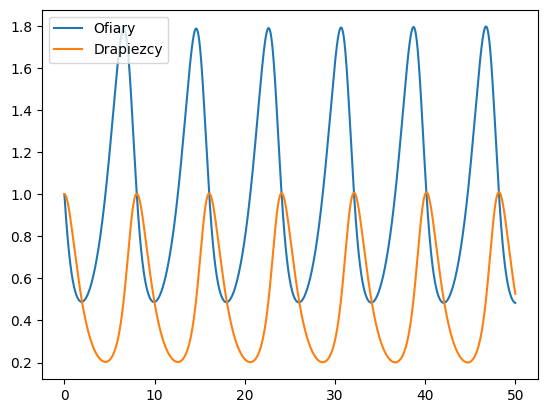

In [10]:
k = 0.001

N1_list, N2_list = [1], [1]

N1_list2, N2_list2 =[2], [1]

N1_list3, N2_list3 = [3], [1]

e1, g1, e2, g2 = 2/3, 4/3, 1, 1

t_space = np.arange(0, 50+k, k)

for t in t_space:
    
    N1_list.append(N1_th(e1, g1, N1_list[-1], N2_list[-1], k))
    N2_list.append(N2_th(e2, g2, N1_list[-2], N2_list[-1], k))
    
    N1_list2.append(N1_th(e1, g1, N1_list2[-1], N2_list2[-1], k))
    N2_list2.append(N2_th(e2, g2, N1_list2[-2], N2_list2[-1], k))

    N1_list3.append(N1_th(e1, g1, N1_list3[-1], N2_list3[-1], k))
    N2_list3.append(N2_th(e2, g2, N1_list3[-2], N2_list3[-1], k))


plt.plot(t_space, N1_list[:-1], label='Ofiary')
plt.plot(t_space, N2_list[:-1], label='Drapiezcy')
plt.legend()
plt.show()

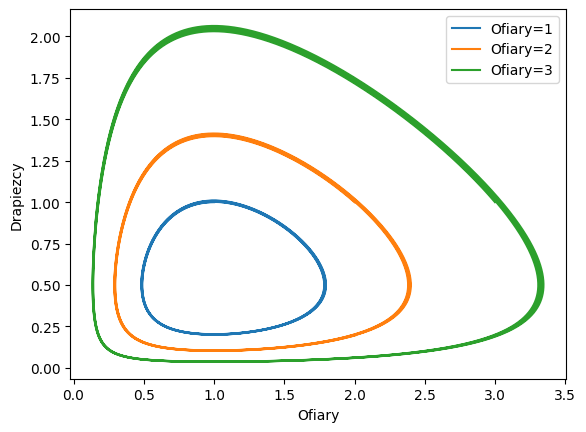

In [11]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(N1_list, N2_list, label='Ofiary=1')
axes.plot(N1_list2, N2_list2, label='Ofiary=2')
axes.plot(N1_list3, N2_list3, label='Ofiary=3')
axes.set_xlabel('Ofiary')
axes.set_ylabel('Drapiezcy')
axes.legend()
plt.show()

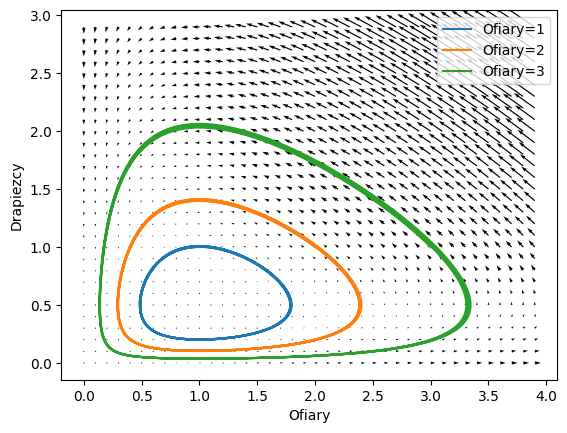

In [27]:
N1_space = np.arange(0,4,0.1)
N2_space = np.arange(0,3,0.1)

grid = np.meshgrid(N1_space, N2_space)

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
#plt.scatter(grid[0], grid[1])
axes.quiver(grid[0], grid[1], N1_prim(e1, g1, grid[0], grid[1]), N2_prim(e2, g2, grid[0], grid[1]))

axes.plot(N1_list, N2_list, label='Ofiary=1')
axes.plot(N1_list2, N2_list2, label='Ofiary=2')
axes.plot(N1_list3, N2_list3, label='Ofiary=3')
axes.set_xlabel('Ofiary')
axes.set_ylabel('Drapiezcy')
axes.legend()
plt.show()


In [ ]:
import scipy.integrate as si

RK4 = si.RK45()